## Machine Learning pour expliquer les variations journalières des prix des contrats à terme d'électricité en France et en Allemagne

Dans ce notebook, nous allons analyser les facteurs influençant le prix de l'électricité en France et en Allemagne. Nous examinerons l'impact des variations climatiques, des matières premières et des échanges commerciaux sur les prix de l'électricité à court terme (24h). L'objectif est de construire un modèle de machine learning capable d'estimer avec précision les variations journalières des prix des contrats à terme sur l'électricité pour ces deux pays.

Ce projet sera réalisé en suivant la méthodologie CRISP-DM, qui comprend les étapes suivantes:

Business Understanding: Comprendre le contexte métier et les objectifs du projet.
Data Understanding: Explorer et analyser les données fournies pour mieux comprendre leurs caractéristiques.
Data Preparation: Préparer et nettoyer les données pour les adapter aux besoins du modèle de machine learning.
Modelling: Entraîner différents modèles de machine learning et sélectionner le meilleur en fonction des performances.
Evaluation: Évaluer les performances des modèles choisis et analyser les résultats pour en tirer des conclusions.
Après cette introduction, nous entamerons la première étape, "Business Understanding", en détaillant davantage le contexte métier et les objectifs du projet.


## 1. Business Understanding

Dans ce projet, nous cherchons à modéliser le prix de l'électricité à partir de données météorologiques, énergétiques (matières premières) et commerciales pour deux pays européens, la France et l'Allemagne. Le but est de construire un modèle capable d'estimer la variation journalière du prix des contrats à terme (futures) sur l'électricité, en France ou en Allemagne, à partir de ces variables explicatives. Ces contrats permettent d'acheter (ou de vendre) une quantité donnée d'électricité à un prix fixé par le contrat et qui sera livrée à une date future spécifiée (maturité du contrat). Les futures sont des instruments financiers qui donnent une estimation de la valeur de l'électricité au moment de la maturité du contrat à partir des conditions actuelles du marché.

L'importance de ce projet réside dans la possibilité de mieux comprendre les facteurs qui influencent les prix de l'électricité et d'aider les parties prenantes à prendre des décisions éclairées concernant l'achat, la vente ou la production d'électricité. En comprenant les facteurs qui influencent les prix de l'électricité, les entreprises et les gouvernements peuvent optimiser leurs stratégies énergétiques et leurs politiques pour réduire les coûts et favoriser le développement durable.



## 2. Data Understanding
Dans la partie 2, Data Understanding, l'objectif est d'explorer et d'analyser les données pour mieux comprendre leur structure, leur qualité et les relations entre les différentes variables.

### 2.1 Load Initial Data

In [1]:
import pandas as pd

data_x = pd.read_csv("Data_X.csv")
data_y = pd.read_csv("Data_Y.csv")
data_new_x = pd.read_csv("DataNew_X.csv")

Nous avons trois data sets:
- **Data_x**: les données d'entrée
- **Data_y**: les données de sorties (labels)
- **Data_new_x**: les nouvelles données d'entrée a prédire (de meme format et dimensions que data_x)

### 2.2 Describe Data

#### 2.2.1 Aperçu et descriptions des colonnes des datasets

In [2]:
from IPython.display import display, Markdown, Latex
from var_descriptions import columns_desc

# Fonction pour afficher le texte en utilisant le formatage Markdown
def display_m(string):
    display(Markdown(string))
    
# Liste des colonnes des trois data sets
columns_x = data_x.columns.tolist()
columns_y = data_y.columns.tolist()
columns_new_x = data_new_x.columns.tolist()

# Nombre de colonnes des trois data sets
nbr_columns_x = len(columns_x)
nbr_columns_y = len(columns_y)
nbr_columns_new_x = len(columns_new_x)

# Affichage du nombre d'entrées et de colonnes de chaque data set
display_m(f"**Data_x** est composé de **{len(data_x)}** entrées \
avec **{nbr_columns_x}** colonnes")
display_m(f"**Data_y** est composé de **{len(data_y)}** labels \
avec **{nbr_columns_y}** colonnes")
display_m(f"Le data set a predire **Data_new_x** est composé de \
**{len(data_new_x)}** entrées avec **{nbr_columns_new_x}** colonnes")
display_m(f"Le data set de prediction **Data_new_y** devrait entre composé de \
**{len(data_x)}**")

# Affichage des descriptions des colonnes pour Data_x
display_m(f"<br>Descriptions des {nbr_columns_x} colonnes pour **Data_x**:")
table_header = "| Colonne | Description |\n| --- | --- |"
table_rows = "\n".join([f"| {column} | {columns_desc[column]} |" for column in columns_x])
display_m(table_header + "\n" + table_rows)

# Affichage des descriptions des colonnes pour Data_y
display_m(f"<br>Descriptions des {nbr_columns_y} colonnes pour **Data_y**:")
table_rows = "\n".join([f"| {column} | {columns_desc[column]} |" for column in columns_y])
display_m(table_header + "\n" + table_rows)



**Data_x** est composé de **1494** entrées avec **35** colonnes

**Data_y** est composé de **1494** labels avec **2** colonnes

Le data set a predire **Data_new_x** est composé de **654** entrées avec **35** colonnes

Le data set de prediction **Data_new_y** devrait entre composé de **1494**

<br>Descriptions des 35 colonnes pour **Data_x**:

| Colonne | Description |
| --- | --- |
| ID | Identifiant unique pour chaque entrée |
| DAY_ID | Date de l'entrée sous forme numérique |
| COUNTRY | Pays concerné par l'entrée - DE = Allemagne, FR = France |
| DE_CONSUMPTION | Consommation d'électricité en Allemagne |
| FR_CONSUMPTION | Consommation d'électricité en France |
| DE_FR_EXCHANGE | Electricité échangée entre Allemagne et France |
| FR_DE_EXCHANGE | Electricité échangée entre France et Allemagne |
| DE_NET_EXPORT | Electricité exportée par l'Allemagne vers l'Europe |
| FR_NET_EXPORT | Electricité exportée par la France vers l'Europe |
| DE_NET_IMPORT | Electricité importée en Allemagne depuis l'Europe |
| FR_NET_IMPORT | Electricité importée en France depuis l'Europe |
| DE_GAS | Volume de gaz naturel consommé en Allemagne |
| FR_GAS | Volume de gaz naturel consommé en France |
| DE_COAL | Volume de charbon consommé en Allemagne |
| FR_COAL | Volume de charbon consommé en France |
| DE_HYDRO | Production d'électricité d'origine hydraulique en Allemagne |
| FR_HYDRO | Production d'électricité d'origine hydraulique en France |
| DE_NUCLEAR | Production d'électricité d'origine nucléaire en Allemagne |
| FR_NUCLEAR | Production d'électricité d'origine nucléaire en France |
| DE_SOLAR | Production d'électricité d'origine photovoltaïque en Allemagne |
| FR_SOLAR | Production d'électricité d'origine photovoltaïque en France |
| DE_WINDPOW | Production d'électricité d'origine éolienne en Allemagne |
| FR_WINDPOW | Production d'électricité d'origine éolienne en France |
| DE_LIGNITE | Volume de lignite consommé en Allemagne |
| DE_RESIDUAL_LOAD | Electricité consommée après utilisation des énergies renouvelables en Allemagne |
| FR_RESIDUAL_LOAD | Electricité consommée après utilisation des énergies renouvelables en France |
| DE_RAIN | Quantité de pluie tombée en Allemagne |
| FR_RAIN | Quantité de pluie tombée en France |
| DE_WIND | Vitesse du vent en Allemagne |
| FR_WIND | Vitesse du vent en France |
| DE_TEMP | Température en Allemagne |
| FR_TEMP | Température en France |
| GAS_RET | Prix journalier du gaz naturel en Europe |
| COAL_RET | Prix journalier du charbon en Europe |
| CARBON_RET | Prix journalier des émissions de carbone en Europe |

<br>Descriptions des 2 colonnes pour **Data_y**:

| Colonne | Description |
| --- | --- |
| ID | Identifiant unique pour chaque entrée |
| TARGET | Variation journalière du prix de futures d'électricité (maturité 24h) |

Chaque enregistrement des datasets est identifié par un **ID**.
Verifions que les IDs correspondent entre le data set d'entrée **Data_x** et les labels **Data_y**.

### 2.2.2 Identifiants et Indexes

In [14]:
# Identifiants des dataset data_x et data_y
ids_x = data_x['ID']
ids_y = data_y['ID']

if ids_x.equals(ids_y):
    display_m("**Data_x** et **Data_y** ont le même ordre des **ID**.")
else:
    display_m("**Data_x** et **Data_y** n'ont pas le même ordre des ID.")

**Data_x** et **Data_y** ont le même ordre des **ID**.

Ainsi, **Data_x** et **Data_y** correpondent pour un meme index. Nous pourront donc eliminer les colonnes **ID** des datasets data_x, data_y ainsi que dans le dataset data_new_x.

### 2.2.3 Variables categorielles

In [10]:
# Obtenir les types de données de chaque colonne
data_types = data_x.dtypes

# Filtrer les colonnes de type "object" (variables catégorielles)
categorical_vars = data_types[data_types == 'object'].index.tolist()

# Afficher les noms des variables catégorielles détectées
print("Variables catégorielles :")
for var in categorical_vars:
    print("- " + var)

# Afficher les valeurs possibles pour chaque variable catégorielle
for var in categorical_vars:
    print(f"\nValeurs possibles pour la variable {var} :")
    print(data_x[var].unique())

Variables catégorielles :
- COUNTRY

Valeurs possibles pour la variable COUNTRY :
['FR' 'DE']


La seul variable catégorielle est la variable **COUNTRY** qui peut prendre comme valeur **'FR'** ou **'DE'**. Chaques entrées dans les data sets des entrées seront diviser en deux: un data set pour les conditions francaises et allemandes.<br>
Nous allons donc obtenir :<br>
- Pour Data_x : Data_x_fr et Data_x_de
- Pour Data_new_x : Data_new_x_fr et Data_new_x_de

### 2.3 Explore Data

### 2.3.1 Analyse univariée

In [12]:
# Statistiques descriptives pour chaque variable
stats = data_x.describe()

# Transposer le résultat pour un affichage plus clair
stats = stats.transpose()

# Calculer le mode pour chaque variable
mode = data_x.mode().iloc[0]

# Ajouter le mode aux statistiques
stats["mode"] = mode

# Afficher les statistiques descriptives
display(stats)

,count,mean,std,min,25%,50%,75%,max,mode
ID,1494.0,1072.759036,618.013179,0.000000,540.250000,1077.500000,1597.500000,2146.000000,0
DAY_ID,1494.0,591.861446,345.065043,0.000000,292.250000,591.000000,885.750000,1215.000000,2.0
DE_CONSUMPTION,1494.0,0.427442,0.673412,-2.265563,-0.037421,0.357061,0.922057,2.033851,1.017328
FR_CONSUMPTION,1494.0,-0.020032,0.918995,-1.462350,-0.716771,-0.394166,0.650533,3.300640,-1.46235
DE_FR_EXCHANGE,1469.0,-0.145508,0.970226,-2.856874,-0.875213,-0.164287,0.638867,2.634831,0.825804
FR_DE_EXCHANGE,1469.0,0.145508,0.970226,-2.634831,-0.638867,0.164287,0.875213,2.856874,-0.825804
DE_NET_EXPORT,1370.0,-0.256332,0.957443,-2.464849,-0.977214,-0.306899,0.452252,2.279619,-2.464849
FR_NET_EXPORT,1424.0,-0.072643,1.075830,-2.825331,-0.851500,0.099455,0.794843,1.951516,0.536853
DE_NET_IMPORT,1370.0,0.256332,0.957443,-2.279619,-0.452252,0.306899,0.977214,2.464849,-2.279619
FR_NET_IMPORT,1424.0,0.072643,1.075830,-1.951516,-0.794843,-0.099455,0.851500,2.825331,-0.536853


### 2.3.2 Analyse bivariée

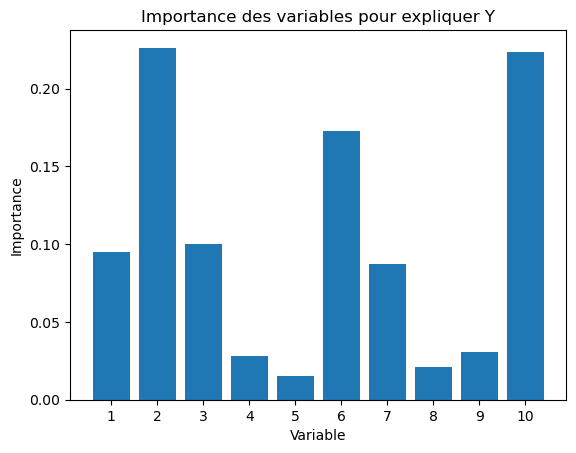

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

# Générer des données de démonstration
data_x, data_y = make_regression(n_features=10, n_samples=1000, random_state=42)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(data_x, data_y)

# Récupérer les coefficients de régression
coefficients = model.coef_

# Calculer l'importance relative de chaque variable
importance = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Tracer l'histogramme de l'importance des variables
plt.bar(range(data_x.shape[1]), importance)
plt.xticks(range(data_x.shape[1]), range(1, data_x.shape[1]+1))
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables pour expliquer Y')
plt.show()


Dans cette section, nous allons explorer les données pour mieux comprendre leur distribution, détecter les éventuelles anomalies et observer les relations entre les différentes variables.

In [6]:
display(data_x.head())
display(data_x.describe())
display(data_x.info())

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,1494.000000,1494.000000,1494.000000,1494.000000,1469.000000,1469.000000,1370.000000,1424.000000,1370.000000,1424.000000,...,1494.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1494.000000,1494.000000,1494.000000
mean,1072.759036,591.861446,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,0.072643,...,-0.153688,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510
std,618.013179,345.065043,0.673412,0.918995,0.970226,0.970226,0.957443,1.075830,0.957443,1.075830,...,0.896325,0.984233,1.051781,1.056243,1.054692,0.972394,1.003356,1.097768,1.033853,1.098624
min,0.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.678936,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790
25%,540.250000,292.250000,-0.037421,-0.716771,-0.875213,-0.638867,-0.977214,-0.851500,-0.452252,-0.794843,...,-0.802333,-0.642117,-0.503927,-0.652135,-0.672614,-0.618259,-0.647948,-0.624238,-0.458038,-0.522968
50%,1077.500000,591.000000,0.357061,-0.394166,-0.164287,0.164287,-0.306899,0.099455,0.306899,-0.099455,...,-0.460160,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.008493,0.063312,0.054056
75%,1597.500000,885.750000,0.922057,0.650533,0.638867,0.875213,0.452252,0.794843,0.977214,0.851500,...,0.382191,0.335237,0.154351,0.635050,0.824781,0.651832,0.699131,0.676415,0.641446,0.599094
max,2146.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,2.918326,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


None

En examinant les données, nous pouvons voir que le dataset contient 1494 entrées et 35 colonnes. Les cinq premières lignes montrent les valeurs pour les différentes colonnes, ce qui nous donne une idée de la structure du dataset.

La méthode **describe()** nous fournit des statistiques descriptives pour chaque colonne numérique, y compris la moyenne, l'écart-type, les quartiles et les valeurs minimales et maximales. Par exemple, la moyenne de DE_CONSUMPTION est 0.427442, tandis que la moyenne de FR_CONSUMPTION est -0.020032.

En utilisant la méthode **info()**, nous pouvons voir le nombre de valeurs non nulles pour chaque colonne et les types de données.Il est important de noter que certaines colonnes ont des valeurs manquantes, comme DE_NET_EXPORT et DE_NET_IMPORT, qui ont respectivement 1370 et 1424 valeurs non nulles. Ces valeurs manquantes devront être traitées lors du traitement des données.

## 2.4 Verification de la qualité des données
Dans cette section, nous allons vérifier la qualité des données en identifiant les valeurs manquantes, les duplicatas et les valeurs aberrantes.

### 2.4.1 Vérification des valeurs manquantes
Commençons par vérifier s'il y a des valeurs manquantes dans nos datasets.

In [ ]:
# Vérification des valeurs manquantes dans Data_x
missing_values_x = data_x.isnull().sum()
missing_values_new_x = data_new_x.isnull().sum()

# Affichage des colonnes ayant des valeurs manquantes
missing_values_x_cols = missing_values_x[missing_values_x > 0]
missing_values_new_x_cols = missing_values_new_x[missing_values_new_x > 0]

display_m("Colonnes avec des valeurs manquantes dans **Data_x**:")
print(missing_values_x_cols)
display_m("Colonnes avec des valeurs manquantes dans **Data_new_x**:")
print(missing_values_new_x_cols)


### 2.4.2 Vérification des duplicatas
Vérifions maintenant s'il y a des duplicatas dans nos datasets.

In [ ]:
# Vérification des duplicatas dans Data_x et Data_new_x
duplicates_x = data_x.duplicated().sum()
duplicates_new_x = data_new_x.duplicated().sum()

# Affichage du nombre de duplicatas dans chaque dataset
display_m(f"Nombre de duplicatas dans **Data_x**: {duplicates_x}")
display_m(f"Nombre de duplicatas dans **Data_new_x**: {duplicates_new_x}")


### 2.4.3 Vérification des valeurs aberrantes
Enfin, vérifions s'il y a des valeurs aberrantes dans nos datasets en utilisant la méthode de l'écart interquartile (IQR).

In [ ]:
# Fonction pour détecter les valeurs aberrantes en utilisant l'IQR
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    return outliers

# Liste des colonnes numériques
numeric_columns = data_x.select_dtypes(include=['number']).columns.tolist()

# Détection des valeurs aberrantes
outliers_x = detect_outliers_iqr(data_x, numeric_columns)
outliers_new_x = detect_outliers_iqr(data_new_x, numeric_columns)

# Affichage des valeurs aberrantes dans chaque dataset
display_m("Valeurs aberrantes dans **Data_x**:")
print(outliers_x)
display_m("Valeurs aberrantes dans **Data_new_x**:")
print(outliers_new_x)


Après avoir vérifié la qualité des données, nous pourrons passer à l'étape suivante de la méthodologie CRISP-DM, qui est la préparation des données.

## 3. Data Preparation

### Select Data

## Clean Data

## Construct Data

## Integrate Data

## Format Data

#### B. Verification de l'ordre des ID dans *Data_x* et *Data_y*

In [125]:
ids_x = data_x['ID']
ids_y = data_y['ID']

if ids_x.equals(ids_y):
    display_m("**Data_x** et **Data_y** ont le même ordre des **ID**.")
else:
    display_m("**Data_x** et **Data_y** n'ont pas le même ordre des ID.")

**Data_x** et **Data_y** ont le même ordre des **ID**.

#### B. Separation des Data sets *Data_x* et *Data_new_x* sur la variable categorielle *COUNTRY*

In [121]:
# Obtenir les types de données de chaque colonne
data_types = data_x.dtypes

# Filtrer les colonnes de type "object" (variables catégorielles)
categorical_vars = data_types[data_types == 'object'].index.tolist()

# Afficher les noms des variables catégorielles détectées
print("Variables catégorielles :")
for var in categorical_vars:
    print("- " + var)

# Afficher les valeurs possibles pour chaque variable catégorielle
for var in categorical_vars:
    print(f"\nValeurs possibles pour la variable {var} :")
    print(data_x[var].unique())


Variables catégorielles :
- COUNTRY

Valeurs possibles pour la variable COUNTRY :
['FR' 'DE']


In [118]:
import tabulate
from IPython.display import Markdown

columns_x = data_x.columns.tolist()
fr_cols = sorted([col for col in columns_x if col.startswith('FR')])
de_cols = sorted([col for col in columns_x if col.startswith('DE')])
fr_cols.insert(5, '**Colonne Manquante**')
table = list(zip(fr_cols, de_cols))
headers = ["FR columns", "DE columns"]

display(Markdown(tabulate.tabulate(table, headers=headers, tablefmt="pipe")))

| FR columns            | DE columns       |
|:----------------------|:-----------------|
| FR_COAL               | DE_COAL          |
| FR_CONSUMPTION        | DE_CONSUMPTION   |
| FR_DE_EXCHANGE        | DE_FR_EXCHANGE   |
| FR_GAS                | DE_GAS           |
| FR_HYDRO              | DE_HYDRO         |
| **Colonne Manquante** | DE_LIGNITE       |
| FR_NET_EXPORT         | DE_NET_EXPORT    |
| FR_NET_IMPORT         | DE_NET_IMPORT    |
| FR_NUCLEAR            | DE_NUCLEAR       |
| FR_RAIN               | DE_RAIN          |
| FR_RESIDUAL_LOAD      | DE_RESIDUAL_LOAD |
| FR_SOLAR              | DE_SOLAR         |
| FR_TEMP               | DE_TEMP          |
| FR_WIND               | DE_WIND          |
| FR_WINDPOW            | DE_WINDPOW       |

On observe que l'on pourra separer le 

### 2.2 Explore Data

In [12]:
display(data_x.head())
display(data_x.describe())
display(data_x.info())

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,1494.000000,1494.000000,1494.000000,1494.000000,1469.000000,1469.000000,1370.000000,1424.000000,1370.000000,1424.000000,...,1494.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1494.000000,1494.000000,1494.000000
mean,1072.759036,591.861446,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,0.072643,...,-0.153688,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510
std,618.013179,345.065043,0.673412,0.918995,0.970226,0.970226,0.957443,1.075830,0.957443,1.075830,...,0.896325,0.984233,1.051781,1.056243,1.054692,0.972394,1.003356,1.097768,1.033853,1.098624
min,0.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.678936,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790
25%,540.250000,292.250000,-0.037421,-0.716771,-0.875213,-0.638867,-0.977214,-0.851500,-0.452252,-0.794843,...,-0.802333,-0.642117,-0.503927,-0.652135,-0.672614,-0.618259,-0.647948,-0.624238,-0.458038,-0.522968
50%,1077.500000,591.000000,0.357061,-0.394166,-0.164287,0.164287,-0.306899,0.099455,0.306899,-0.099455,...,-0.460160,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.008493,0.063312,0.054056
75%,1597.500000,885.750000,0.922057,0.650533,0.638867,0.875213,0.452252,0.794843,0.977214,0.851500,...,0.382191,0.335237,0.154351,0.635050,0.824781,0.651832,0.699131,0.676415,0.641446,0.599094
max,2146.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,2.918326,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


None

En examinant les données, nous pouvons voir que le dataset contient 1494 entrées et 35 colonnes. Les cinq premières lignes montrent les valeurs pour les différentes colonnes, ce qui nous donne une idée de la structure du dataset.

La méthode describe() nous fournit des statistiques descriptives pour chaque colonne numérique, y compris la moyenne, l'écart-type, les quartiles et les valeurs minimales et maximales. Par exemple, la moyenne de DE_CONSUMPTION est 0.427442, tandis que la moyenne de FR_CONSUMPTION est -0.020032.

En utilisant la méthode info(), nous pouvons voir le nombre de valeurs non nulles pour chaque colonne et les types de données.Il est important de noter que certaines colonnes ont des valeurs manquantes, comme DE_NET_EXPORT et DE_NET_IMPORT, qui ont respectivement 1370 et 1424 valeurs non nulles. Ces valeurs manquantes devront être traitées lors du traitement des données.

## 2.3 Verify Data Quality 

# FIN

In [4]:
ids_x = data_x['ID']
ids_y = data_y['ID']

if ids_x.equals(ids_y):
    print("Les dataframes ont le même ordre des ID.")
else:
    print("Les dataframes n'ont pas le même ordre des ID.")



Les dataframes ont le même ordre des ID.


        ID    TARGET
0     1054  0.028313
1     2049 -0.112516
2     1924 -0.180840
3      297 -0.260356
4     1101 -0.071733
...    ...       ...
1489   459 -0.172597
1490  1674 -0.063546
1491   748  0.151797
1492  1454 -0.640917
1493   359 -0.252764

[1494 rows x 2 columns]


ValueError: x and y must be the same size

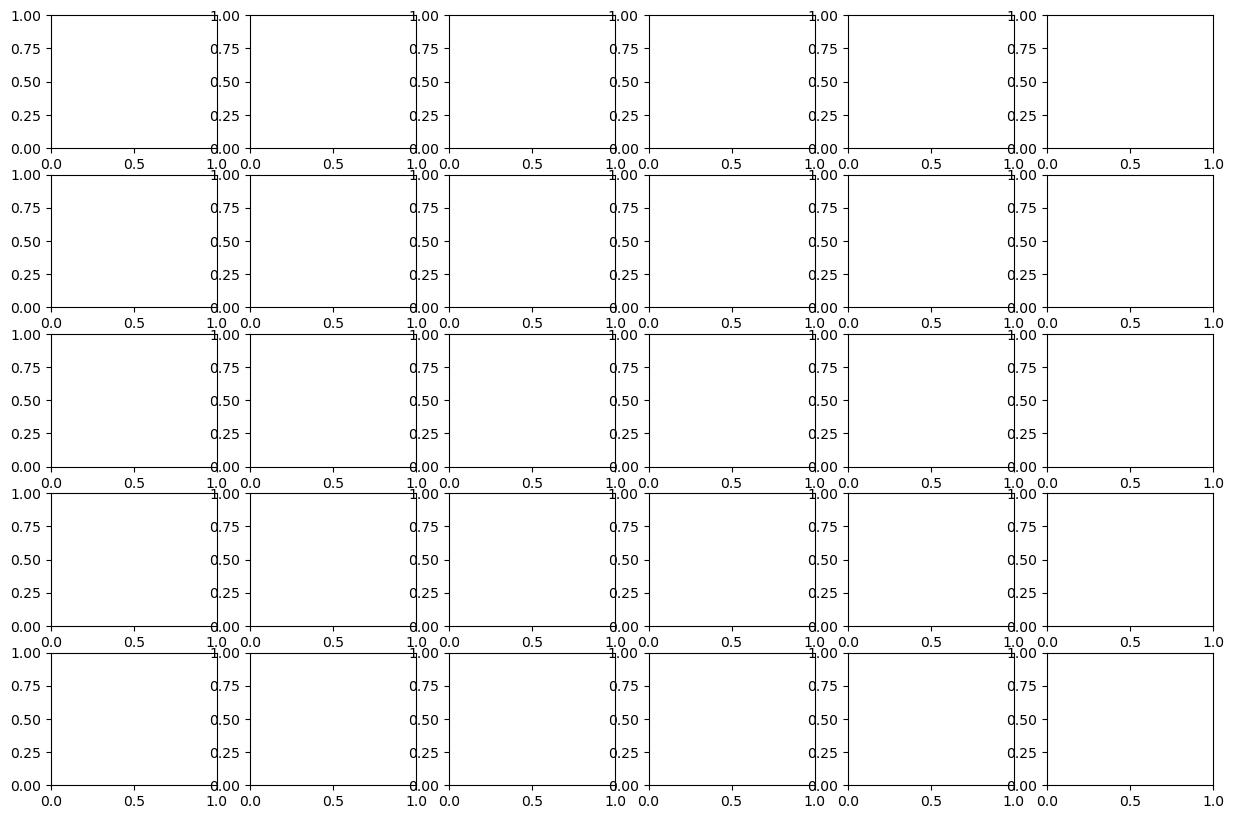

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sélection des données pertinentes pour la prédiction des prix des contrats à terme en France
X = data_x
y = data_y
print(data_y)

# Visualisation de la relation entre les variables
fig, ax = plt.subplots(nrows=5, ncols=6, figsize=(15, 10))
for i in range(X.shape[1]):
    ax[i//6][i%6].scatter(X.iloc[:,i], y)
    ax[i//6][i%6].set_title(X.columns[i])
plt.show()

# Test de normalité des résidus
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
residuals = y_test - y_pred
print("Test de normalité des résidus - Shapiro-Wilk test")
stat, p = shapiro(residuals)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Les résidus semblent suivre une distribution normale')
else:
    print('Les résidus ne suivent probablement pas une distribution normale')

# Test de l'hypothèse de linéarité
print("Test de linéarité - Rainbow test")
rainbow_stat, rainbow_p_value = linear_rainbow(reg, X_test)
print('stat=%.3f, p=%.3f' % (rainbow_stat, rainbow_p_value))
if rainbow_p_value > 0.05:
    print('L\'hypothèse de linéarité n\'est pas rejetée')
else:
    print('L\'hypothèse de linéarité est rejetée')


In [11]:
display(data_x.columns)
display(data_x.head())
display(data_x.describe())
display(data_x.info())

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,-0.256332,0.692860,0.256332,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,-0.256332,0.990324,0.256332,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,...,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,1072.759036,591.861446,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,0.072643,...,-0.153688,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510
std,618.013179,345.065043,0.673412,0.918995,0.962068,0.962068,0.916821,1.050307,0.916821,1.050307,...,0.896325,0.952745,1.018132,1.022452,1.020950,0.941285,0.971257,1.097768,1.033853,1.098624
min,0.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.678936,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790
25%,540.250000,292.250000,-0.037421,-0.716771,-0.869990,-0.631683,-0.921263,-0.820640,-0.395910,-0.774676,...,-0.802333,-0.618791,-0.488625,-0.633867,-0.645796,-0.577139,-0.597690,-0.624238,-0.458038,-0.522968
50%,1077.500000,591.000000,0.357061,-0.394166,-0.145508,0.145508,-0.256332,0.041508,0.256332,-0.041508,...,-0.460160,-0.211042,-0.193154,-0.193572,-0.146217,0.009451,0.008404,0.008493,0.063312,0.054056
75%,1597.500000,885.750000,0.922057,0.650533,0.631683,0.869990,0.395910,0.774676,0.921263,0.820640,...,0.382191,0.274779,0.125947,0.587377,0.677040,0.569285,0.650856,0.676415,0.641446,0.599094
max,2146.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,2.918326,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1494 non-null   float64
 6   FR_DE_EXCHANGE    1494 non-null   float64
 7   DE_NET_EXPORT     1494 non-null   float64
 8   FR_NET_EXPORT     1494 non-null   float64
 9   DE_NET_IMPORT     1494 non-null   float64
 10  FR_NET_IMPORT     1494 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


None

En examinant les données, nous pouvons voir que le dataset contient 1494 entrées et 35 colonnes. Les cinq premières lignes montrent les valeurs pour les différentes colonnes, ce qui nous donne une idée de la structure du dataset.

La méthode **describe()** nous fournit des statistiques descriptives pour chaque colonne numérique, y compris la moyenne, l'écart-type, les quartiles et les valeurs minimales et maximales. Par exemple, la moyenne de DE_CONSUMPTION est 0.427442, tandis que la moyenne de FR_CONSUMPTION est -0.020032.

En utilisant la méthode **info()**, nous pouvons voir le nombre de valeurs non nulles pour chaque colonne et les types de données.Il est important de noter que certaines colonnes ont des valeurs manquantes, comme DE_NET_EXPORT et DE_NET_IMPORT, qui ont respectivement 1370 et 1424 valeurs non nulles. Ces valeurs manquantes devront être traitées lors du traitement des données.

# 3 Data Preparation

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Vérifier si la colonne 'ID' a des doublons
duplicated_rows = data_x[data_x['ID'].duplicated()]
most_common_day = data_x['DAY_ID'].value_counts().idxmax()
print("Le jour qui apparaît le plus est:", most_common_day)

if duplicated_rows.empty:
    print("Aucun doublon trouvé dans la colonne 'ID'.")
else:
    print("Nombre de doublons dans la colonne 'ID':", len(duplicated_rows))
    display(duplicated_rows)
    
# Vérifier si la colonne 'DAY_ID' a des doublons
duplicated_dayid_rows = data_x[data_x['DAY_ID'].duplicated()]

if duplicated_dayid_rows.empty:
    print("Aucun doublon trouvé dans la colonne 'DAY_ID'.")
else:
    print("Nombre de doublons dans la colonne 'DAY_ID':", len(duplicated_dayid_rows),
         f"=> {len(duplicated_dayid_rows)}")
    display(duplicated_dayid_rows)


# Gérer les valeurs manquantes
numerical_columns = data_x.select_dtypes(include=['float64', 'int64']).columns
data_x[numerical_columns] = data_x[numerical_columns].fillna(data_x[numerical_columns].mean())  # Remplir les valeurs manquantes avec la moyenne

# Convertir les types de données
data_x['DAY_ID'] = pd.to_datetime(data_x['DAY_ID'], format='%Y%m%d')  # Convertir les dates en objets datetime

# Normalisation et mise à l'échelle
scaler = MinMaxScaler()
data_x[numerical_columns] = scaler.fit_transform(data_x[numerical_columns])

# Création de nouvelles variables
data_x['DE_RENEWABLES'] = data_x['DE_SOLAR'] + data_x['DE_WINDPOW']  # Créer une nouvelle colonne pour les énergies renouvelables en Allemagne
data_x['FR_RENEWABLES'] = data_x['FR_SOLAR'] + data_x['FR_WINDPOW']  # Créer une nouvelle colonne pour les énergies renouvelables en France

# Afficher les données traitées
display(data_x.head())


Le jour qui apparaît le plus est: 77
Aucun doublon trouvé dans la colonne 'ID'.
Nombre de doublons dans la colonne 'DAY_ID': 643 => 643


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
35,304,467,DE,-0.295296,-0.765120,-0.717490,0.717490,-1.117139,-0.200305,1.117139,...,-0.860628,-0.962519,-0.193837,-0.871600,-0.917234,0.102046,0.472708,0.891049,0.861408,1.124457
43,1499,1175,FR,-0.328286,-1.062255,-1.380464,1.380464,-1.046122,1.002243,1.046122,...,-1.130258,0.974454,-0.069416,-0.138918,-0.695013,-0.634046,-0.168491,0.122818,0.220077,5.453331
76,526,416,DE,1.001501,-0.206352,1.038238,-1.038238,1.620692,-0.160756,-1.620692,...,-0.558938,1.813061,0.126792,3.841629,1.829509,-0.912344,-1.016197,0.891891,0.789638,0.848012
90,1955,162,FR,1.088204,0.885516,-0.065407,0.065407,-1.376074,-0.863650,1.376074,...,0.967899,-0.689548,-0.646288,-0.393845,-0.338351,1.259225,0.043825,5.674778,-0.132784,3.271059
91,2118,659,FR,0.222004,-0.869954,-0.972050,0.972050,-1.460618,-0.742504,1.460618,...,-1.158139,-0.545103,-0.348744,0.483263,0.883511,0.267114,1.361248,0.218967,-0.250768,-0.092443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,...,0.509514,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.876984,0.819520,1.320373
1490,1674,887,FR,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,...,1.666252,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.932633,-0.085690,0.356356
1491,748,1083,DE,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,...,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152
1492,1454,1133,FR,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,...,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812


ValueError: time data '206' does not match format '%Y%m%d' (match)

### 2.4 Analyser la distribution des variables

### 1.10 Séparer les données pour la France et l'Allemagne

In [14]:
data_x_fr = data_x[data_x['COUNTRY'] == 'FR']
data_x_de = data_x[data_x['COUNTRY'] == 'DE']
df = data_x
categorical_vars = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']
print(categorical_vars)

['COUNTRY']


### 2.5 Analyser les corrélations entre les variables

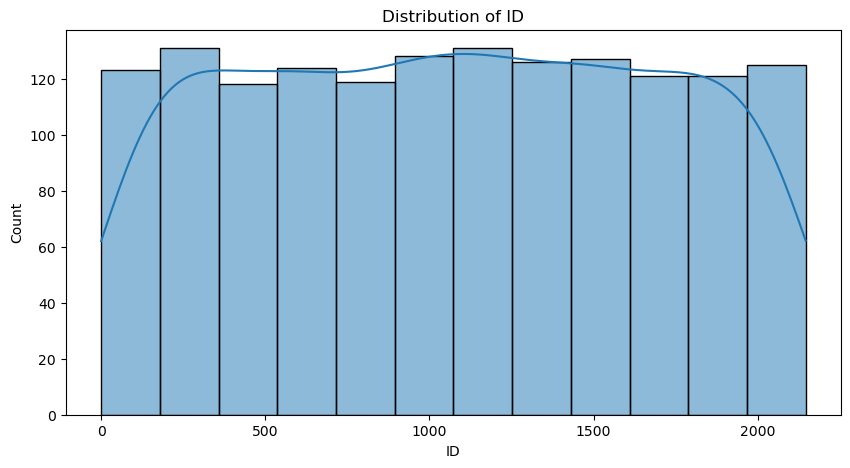

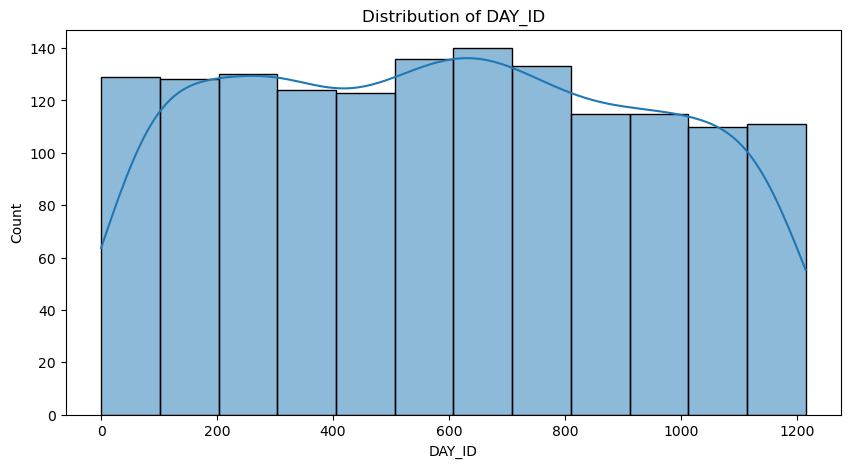

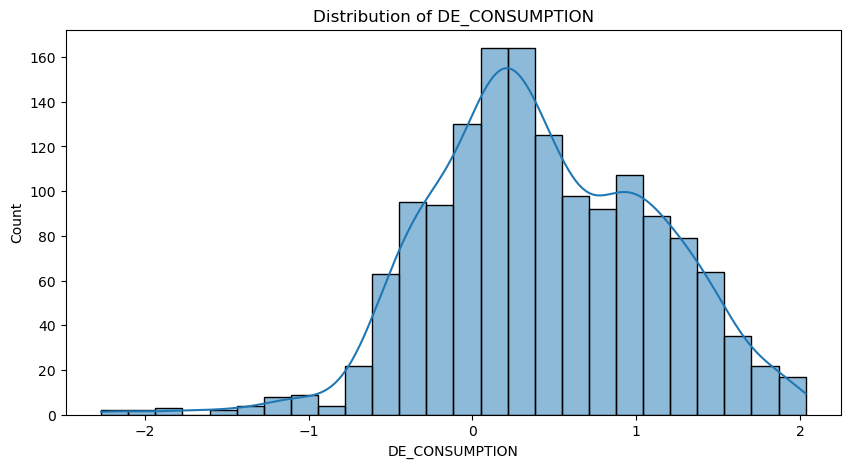

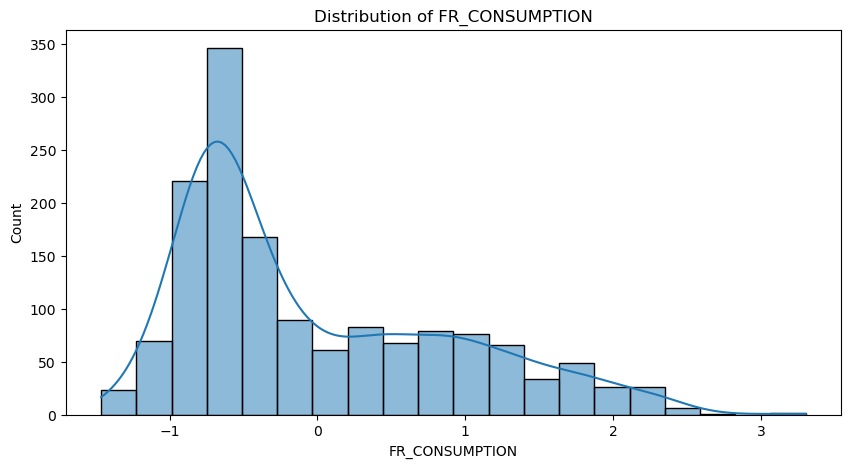

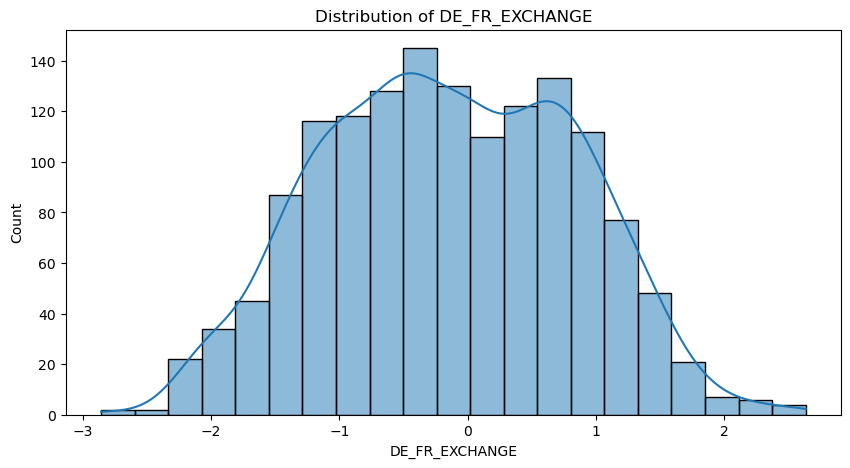

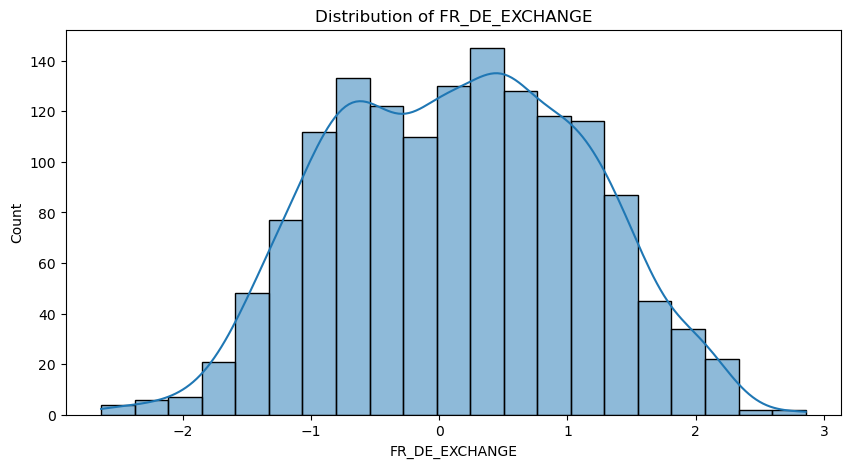

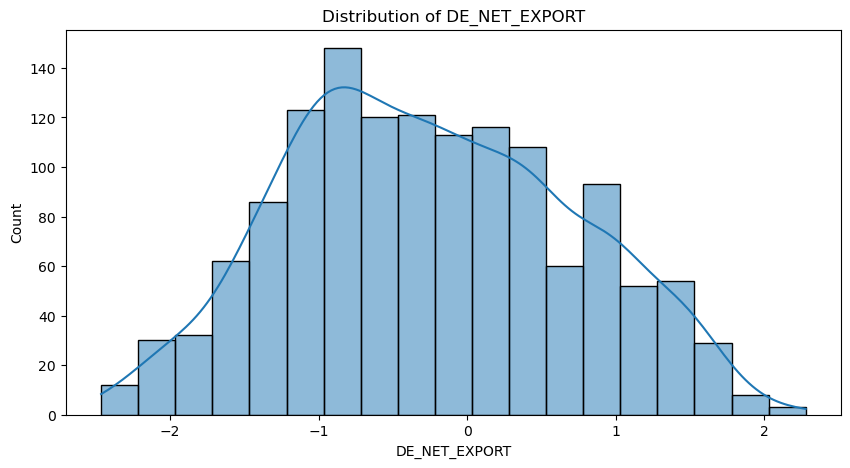

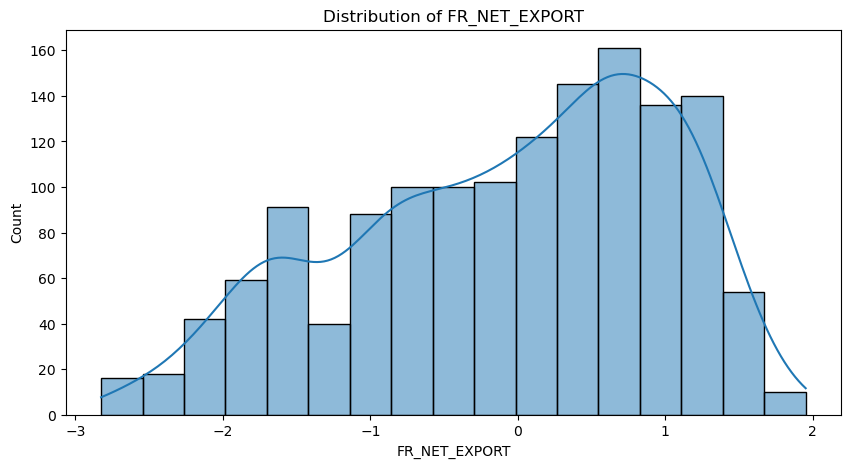

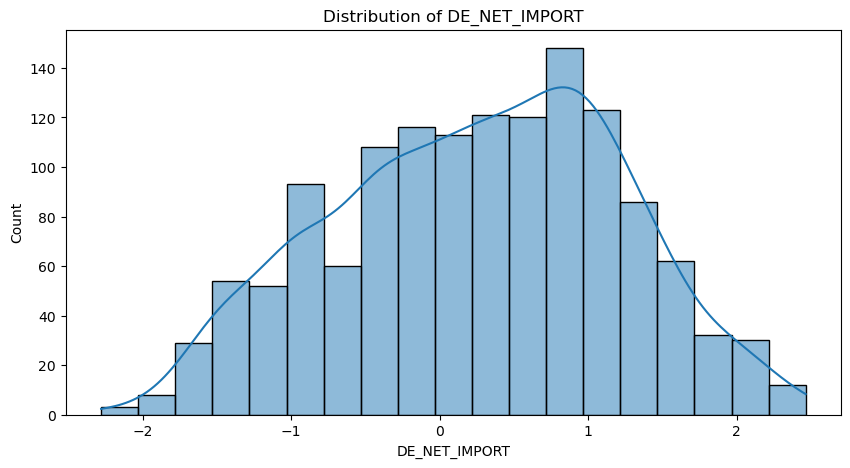

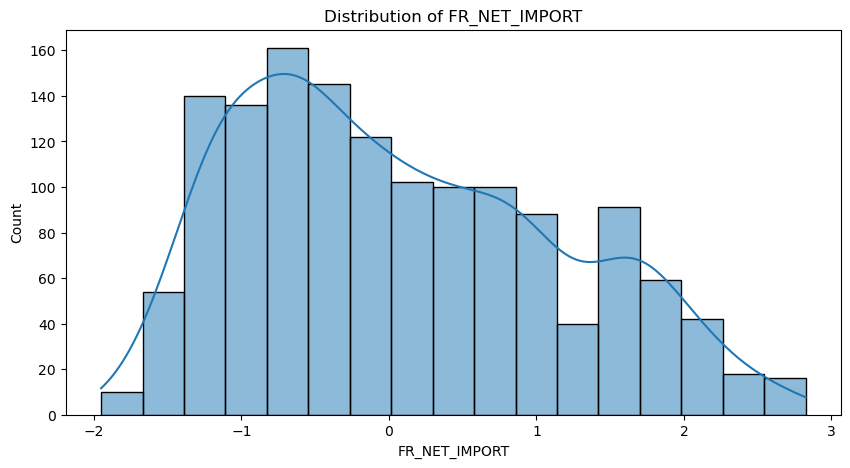

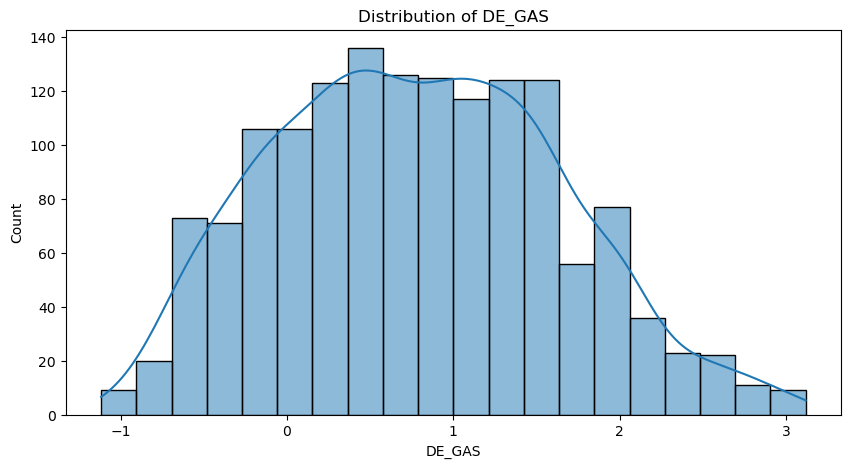

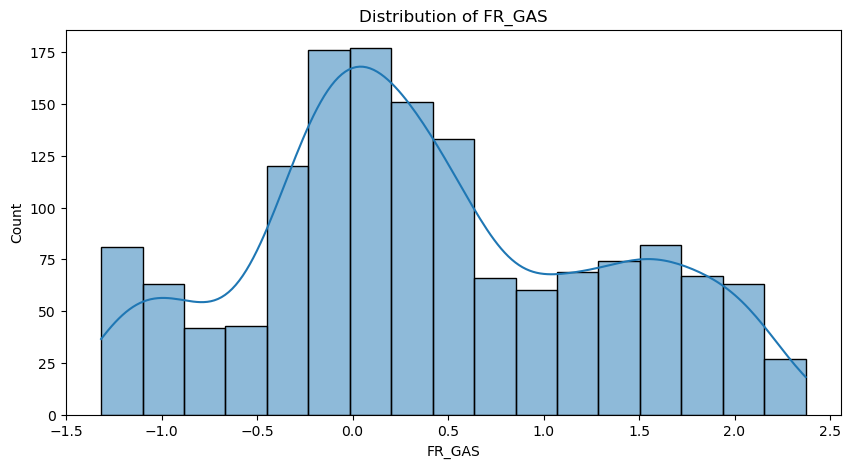

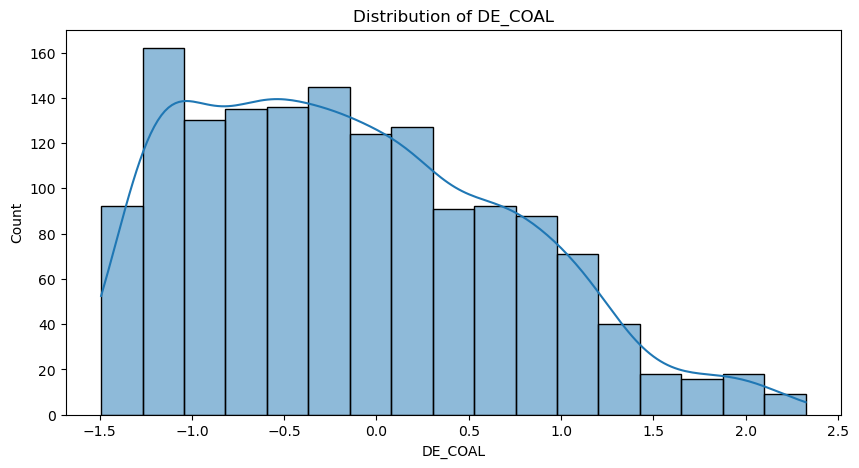

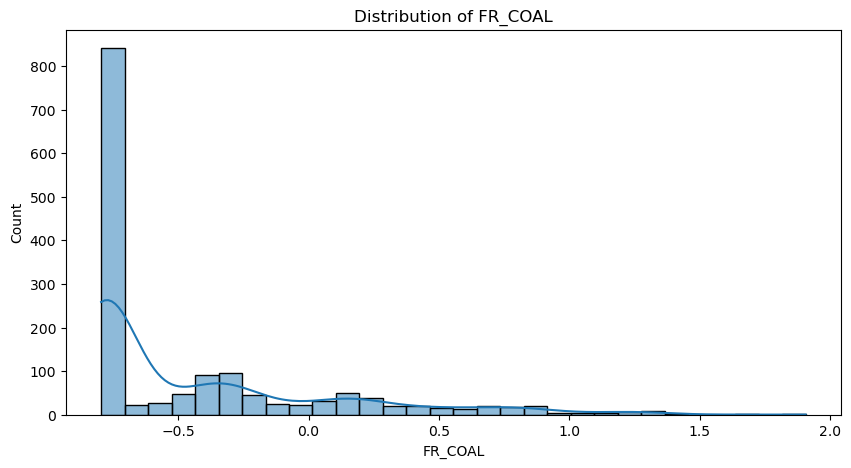

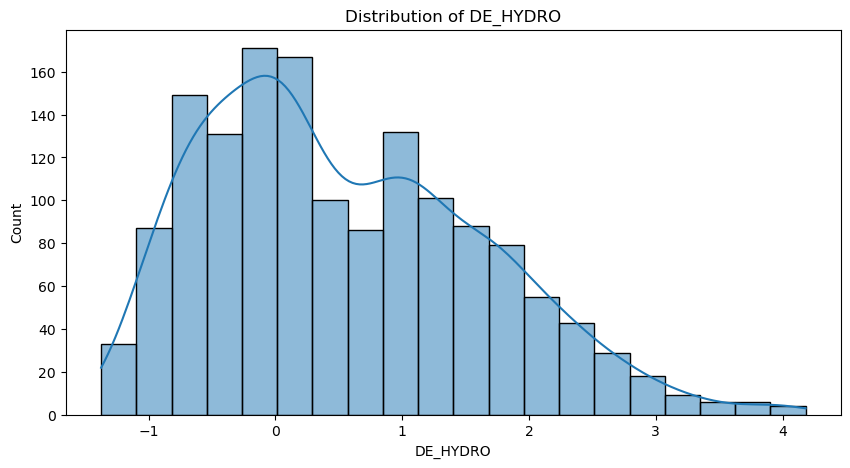

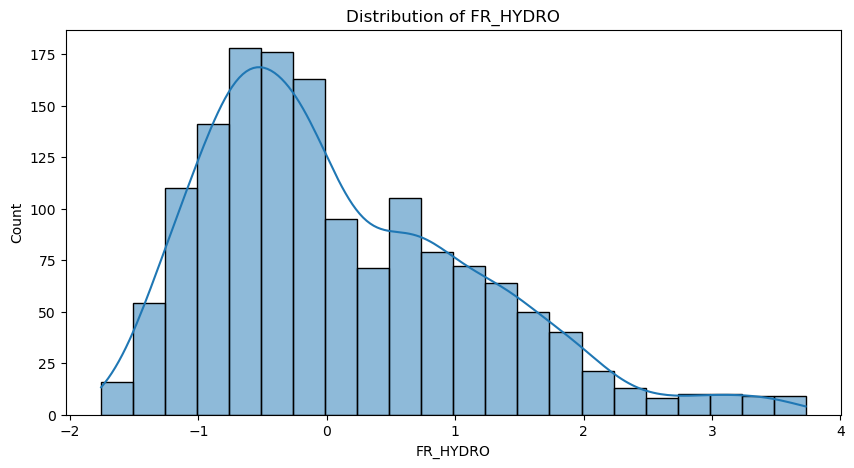

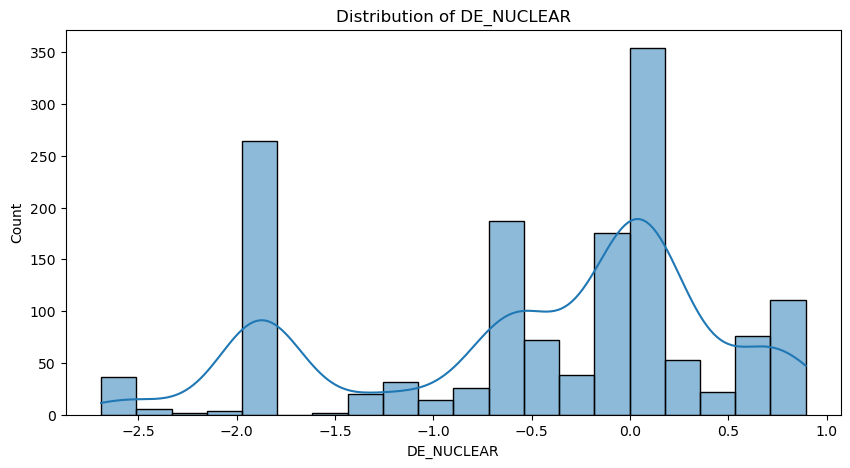

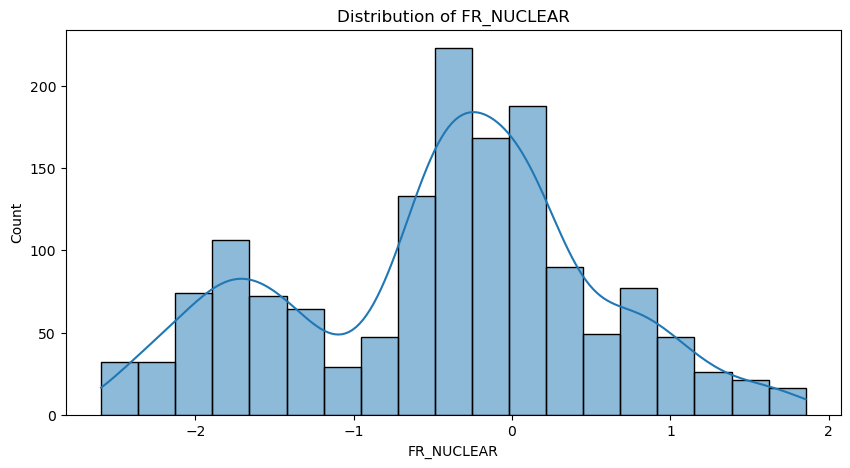

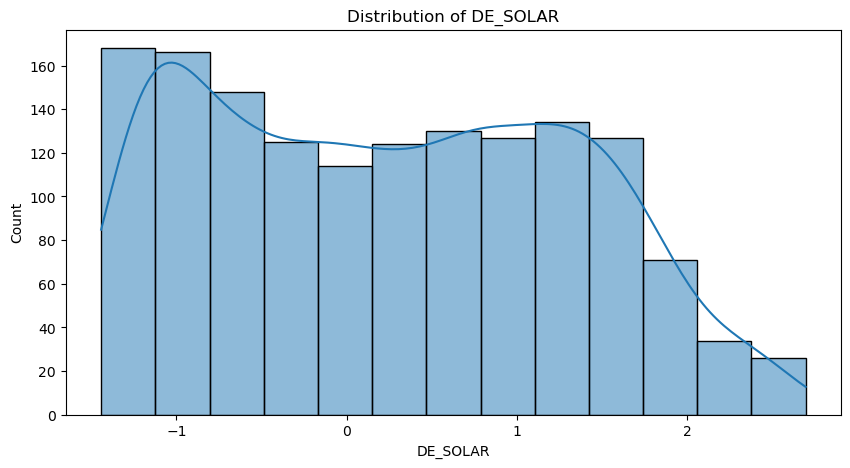

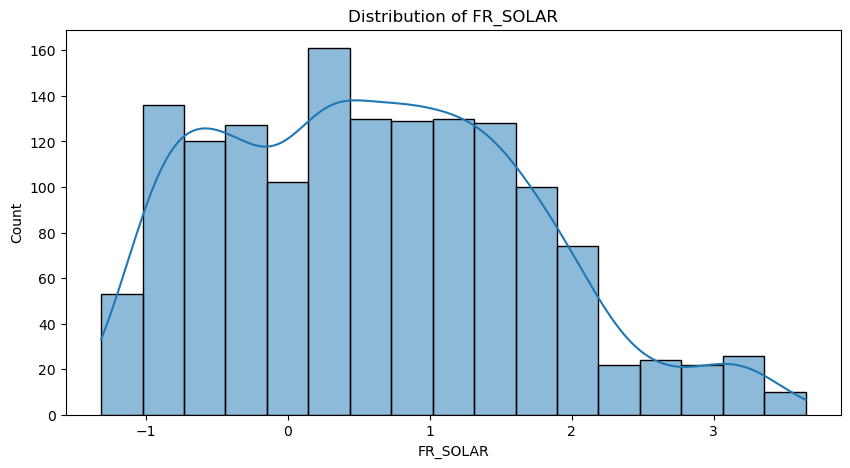

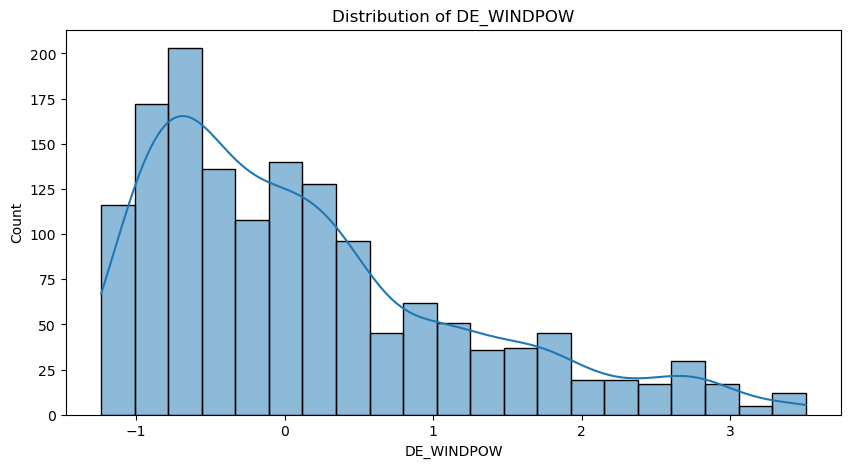

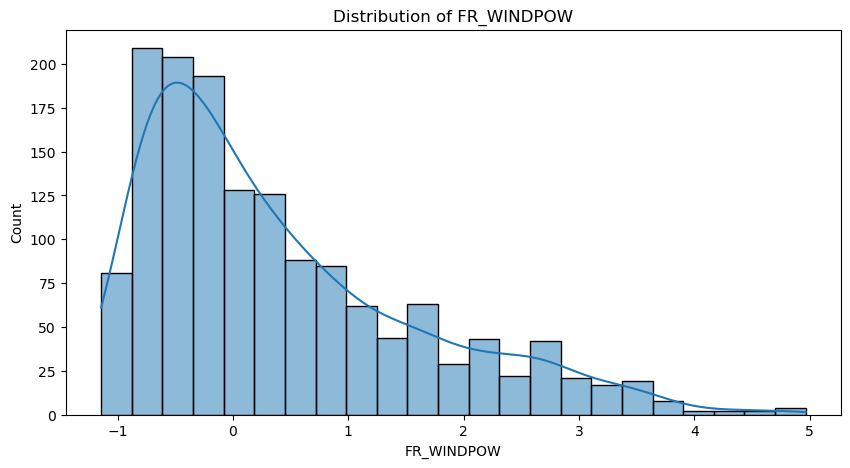

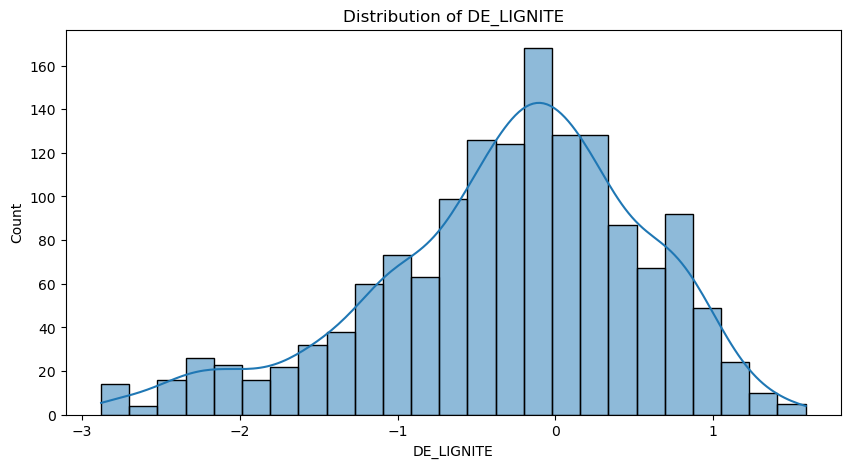

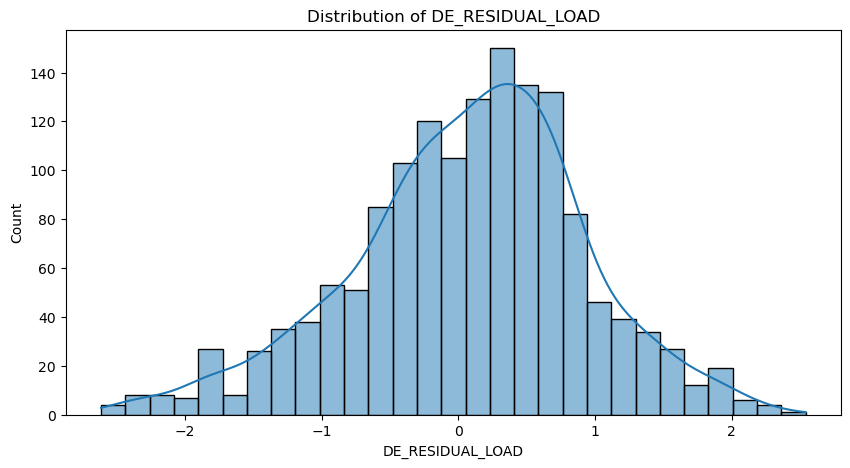

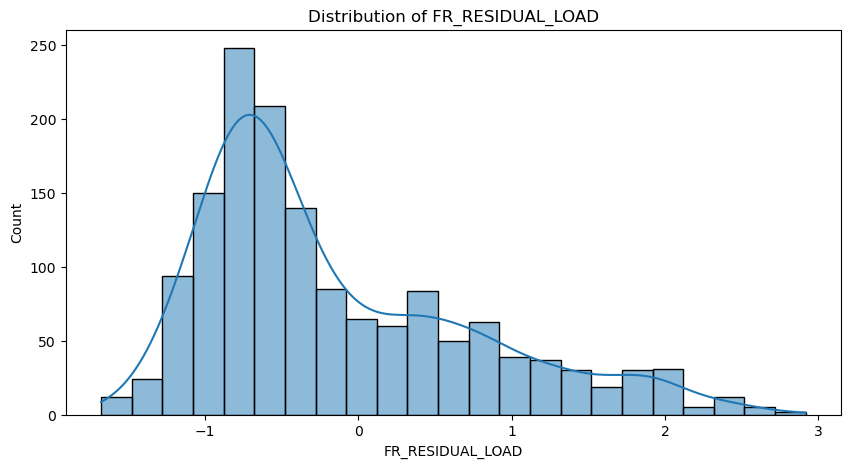

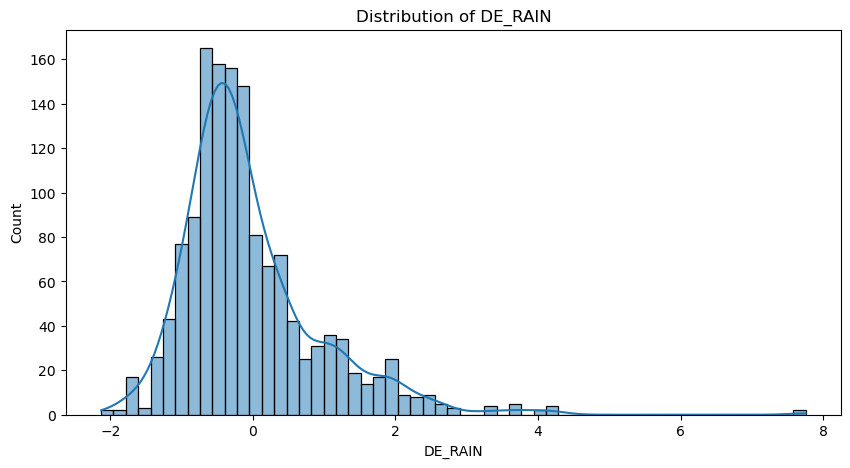

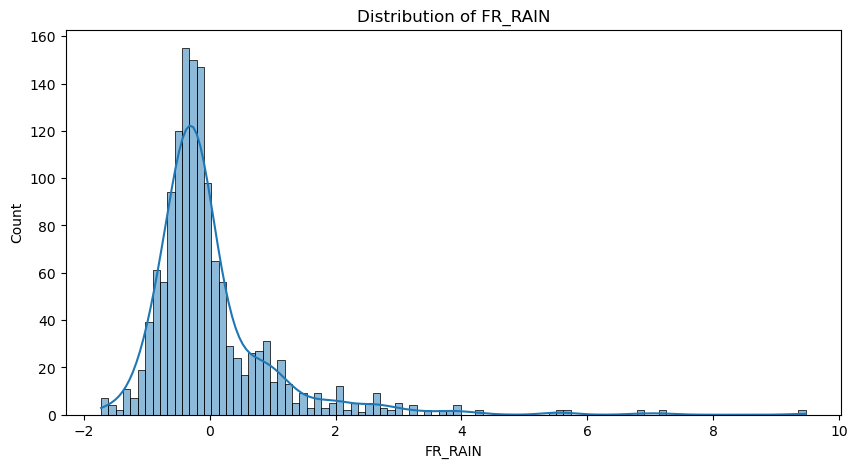

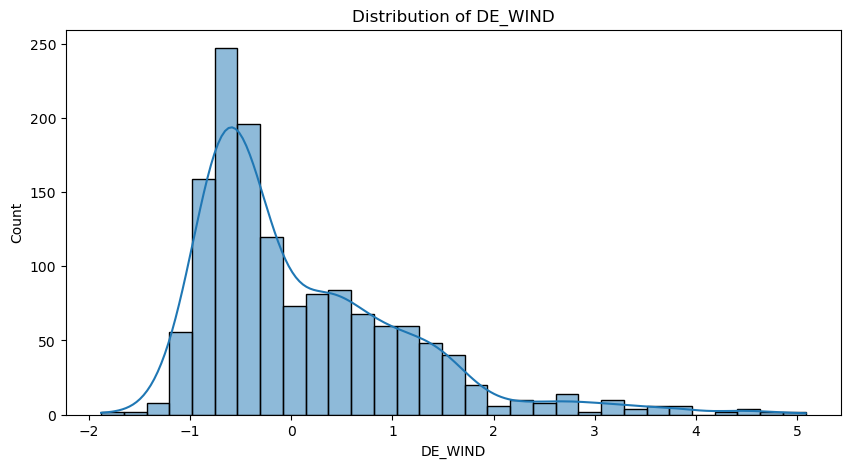

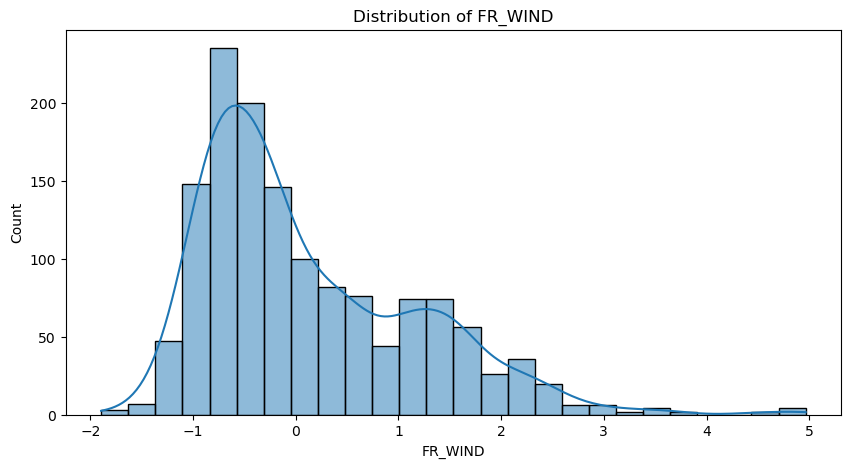

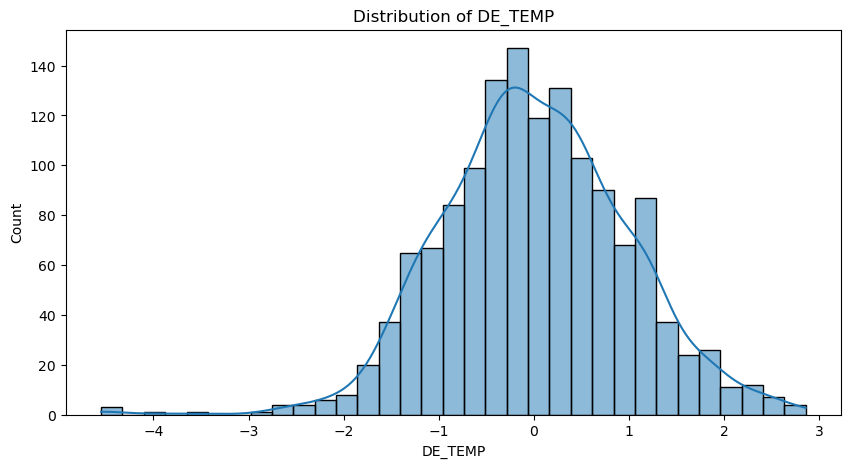

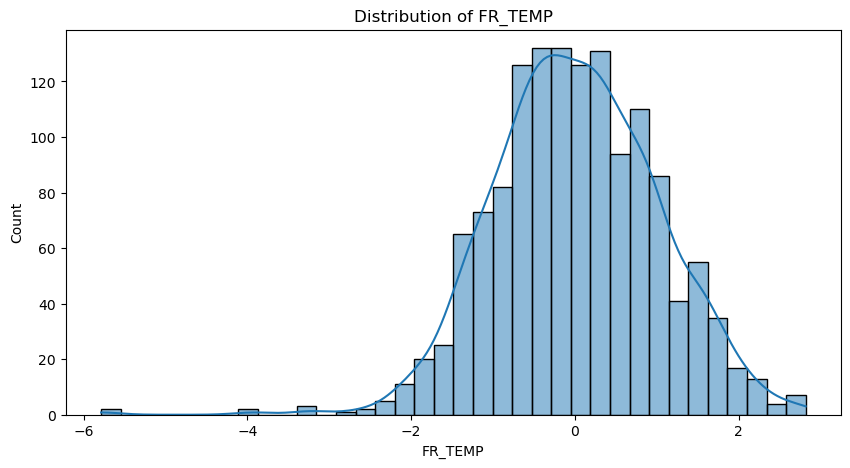

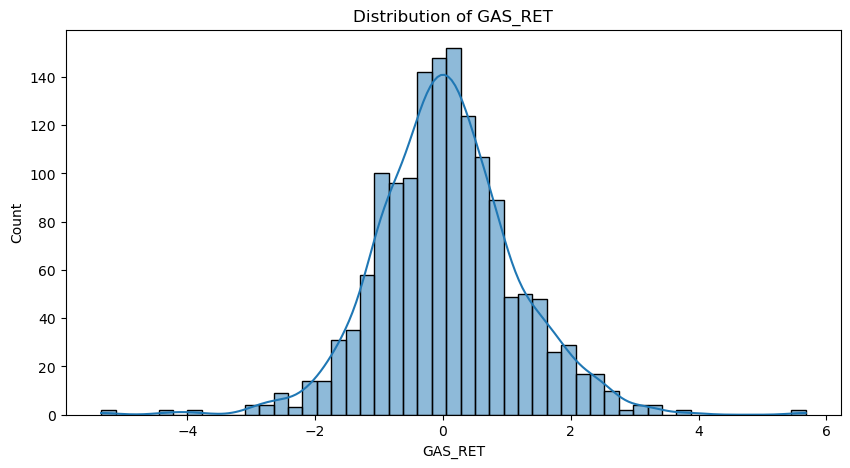

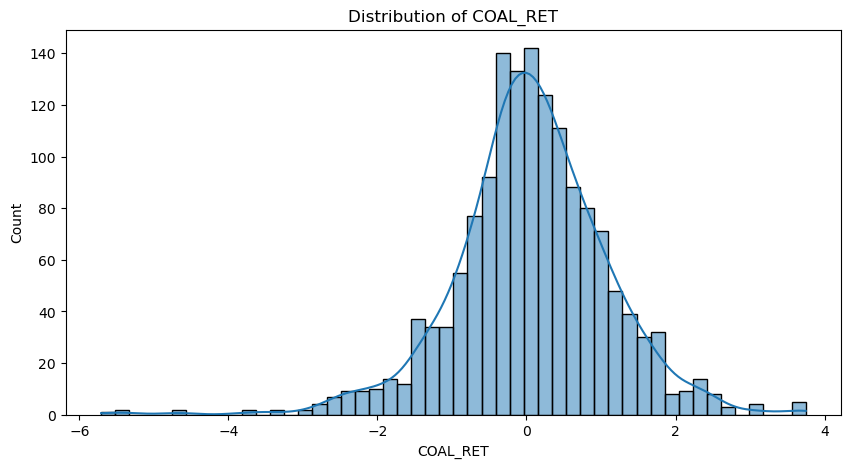

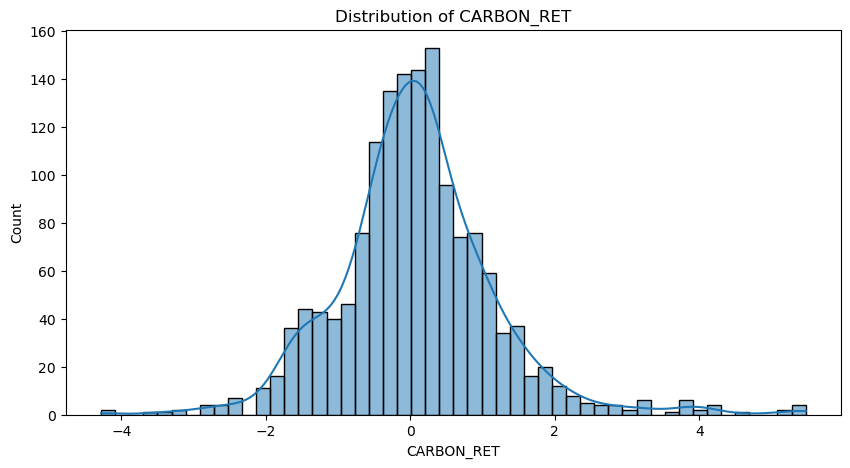

In [10]:
# Histogrammes pour les variables numériques
numerical_columns = data_x.select_dtypes(include=[np.number]).columns.tolist()

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data_x[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [ ]:
# Matrice de corrélation
corr_matrix = data_x.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


## 3. Data preparation

In [4]:
# Vérifier les valeurs manquantes
data_x.isna().sum()

# Traiter les valeurs manquantes (si nécessaire)
data_x.fillna(method='ffill', inplace=True)

# Normaliser les valeurs des attributs (si nécessaire)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_x_scaled = scaler.fit_transform(data_x.drop(columns=['ID', 'DAY_ID', 'COUNTRY']))

# Fractionner les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x_scaled, data_y['TARGET'], test_size=0.2, random_state=42)


## 4. Modelling

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialiser les modèles
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

# Entraîner les modèles
models = [lr, ridge, lasso, knn, dt, rf]

for model in models:
    model.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## 5. Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Évaluer les performances des modèles
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Modèle: {model.__class__.__name__}, MSE: {mse}, R2: {r2}")
